Introduction:
Our group is going to be analyzing what the best neighborhood in Pittsburgh is from an objective and practical standpoint. I will be focusing on traffic counts, this means what neighborhoods are more likely to be filled with bad traffic and amount of speeding done within those neighborhoods. The ability to see how much traffic is in each neighborhood can greatly help determine what areas of Pittsburgh you want to steer clear of.

Metrics:
The dataset used is Traffic Count data, this is a list of reported counts of high traffic and counts of speeding, and how much each count was speeding by. The data was started in 1/1/2019 and is updated to this day.

Plan:
Heat map for high traffic counts
Seperate heat map for what areas are more likely to have people speeding
(using green for low amounts, and red for high)

I will mostly be focusing on both the total counts of each Neighborhood within the dataset, as well as how heavily each neighborhood speeds for the area they are in.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset into the notebook, printing the first 10 lines of the dataset.
data = pd.read_csv("Traffic Count.csv", low_memory=False)
data.head(10)

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15
5,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,25.0,...,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
6,1047444948,17,1.366891e+09,2018-10-18,NaN,NaN,NaN,NaN,NaN,25.0,...,-79.942273,40.446282,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26
7,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,25.0,...,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
8,1073440033,156,1.736165e+09,2017-07-28,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.960385,40.438983,Central Oakland,3.0,4.0,42003040500,3.0,4.0,4.0,2-14
9,1092885547,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-79.920958,40.467294,East Liberty,9.0,11.0,42003111300,2.0,11.0,5.0,3-8


In [3]:
data.groupby("neighborhood").count()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,speed95_percent,longitude,latitude,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Allegheny West,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Arlington,3,3,3,3,3,2,0,3,3,2,...,2,3,3,3,3,3,3,3,3,3
Banksville,1,1,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
Beechview,4,4,3,3,3,3,0,3,3,3,...,3,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Hill,4,4,4,4,3,3,0,3,4,4,...,3,4,4,4,4,4,4,4,4,4
Upper Lawrenceville,1,1,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
West Oakland,2,2,1,1,1,1,0,1,1,1,...,1,2,2,2,2,2,2,2,2,2


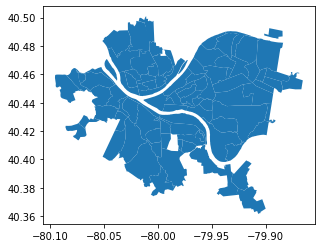

In [4]:
import geopandas
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

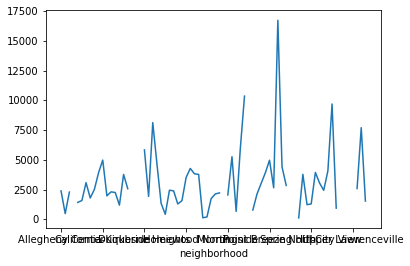

In [5]:
num_traffic = data.groupby("neighborhood").mean()['average_daily_car_traffic']
num_traffic.sort_values(ascending=False)
num_traffic.plot()

In [6]:
trafficdata = data["neighborhood"].value_counts().sort_values(ascending=True)
trafficdata = pd.DataFrame(trafficdata)
trafficdata

,neighborhood
Oakwood,1
Regent Square,1
Allegheny West,1
Allegheny Center,1
Swisshelm Park,1
...,...
Mount Washington,16
Highland Park,16
Shadyside,18
Bloomfield,21


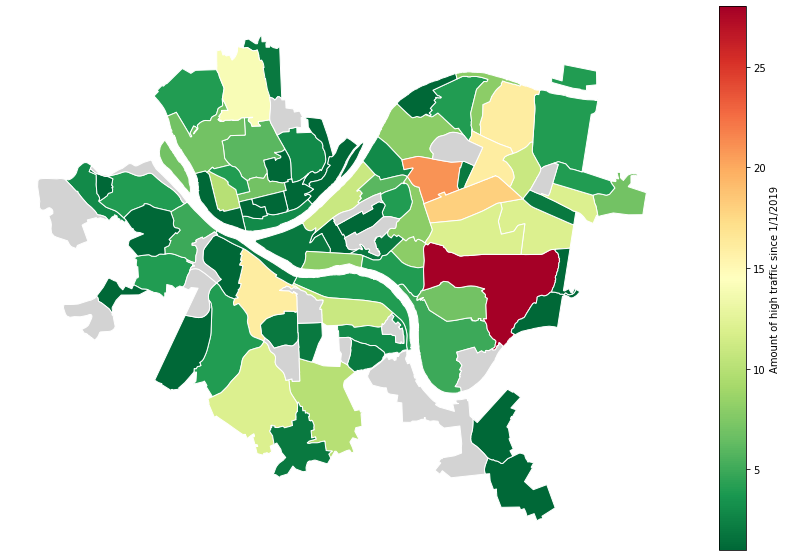

In [8]:
trafficmap = neighborhoods.merge(trafficdata, how = 'left', left_on= 'hood',right_index = True)
trafficmap = trafficmap.plot(column = 'neighborhood', cmap = 'RdYlGn_r', edgecolor = 'white', legend = True,
                            legend_kwds = {'label': "Amount of high traffic since 1/1/2019"}, figsize = (15,10), 
                             missing_kwds={"color": "lightgrey"},)
trafficmap.set_axis_off()